In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import openpyxl
from rdkit.Chem.Draw import IPythonConsole, MolsToGridImage

#Show mols in dataframes
from rdkit.Chem import PandasTools
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage
from IPython.core.display import HTML
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import PandasTools
from rdkit.Chem import AllChem
from rdkit.Chem import rdDepictor
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit import DataStructs
import os
import sys
from scipy.spatial.distance import pdist, squareform

In [2]:
TOP = os.getcwd().replace('notebooks', '')
raw_dir = TOP + 'data/raw/'
processed_dir = TOP +'data/processed/'
interim_dir = TOP + 'data/interim/'
external_dir = TOP + 'data/external/'
figures_dir = TOP + 'reports/figures/'

In [6]:
df = pd.read_excel(external_dir+'Supplemental Excel File EHP11524-revised.xlsx', sheet_name='Excel Table S5', header = [1])

In [8]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
       'non-reproductive/developmental effects', 'Unnamed: 5', 'Unnamed: 6',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'reproductive/developmental effects', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17'],
      dtype='object')

In [10]:
df.iloc[0,:].tolist()

['ID',
 'casrn',
 'dtxsid',
 'name',
 'count',
 'POD [mg/kg-d]',
 'POD GSD2total',
 'POD GSD2final',
 'Prob. RfD [mg/kg-d]',
 'HDM10% [mg/kg-d]',
 'HDM10% GSD2',
 'count',
 'POD [mg/kg-d]',
 'POD GSD2total',
 'POD GSD2final',
 'Prob. RfD [mg/kg-d]',
 'HDM10% [mg/kg-d]',
 'HDM10% GSD2']

In [11]:
mycols = ['ID',
 'casrn',
 'dtxsid',
 'name',
 'non_cancer_count',
 'non_cancer_POD_[mg/kg-d]',
 'non_cancer_POD_GSD2total',
 'non_cancer_POD_GSD2final',
 'non_cancer_Prob_RfD [mg/kg-d]',
 'non_cancer_HDM10%_[mg/kg-d]',
 'non_cancer_HDM10%_GSD2',
 'reproductive/developmental_effects_count',
 'reproductive/developmental_effects_POD_[mg/kg-d]',
 'reproductive/developmental_effects_POD_GSD2total',
 'reproductive/developmental_effects_POD_GSD2final',
 'reproductive/developmental_effects_Prob_RfD_[mg/kg-d]',
 'reproductive/developmental_effects_HDM10%_[mg/kg-d]',
 'reproductive/developmental_effects_HDM10%_GSD2']

In [12]:
df.columns = mycols

In [14]:
df.drop(index = 0, inplace = True, axis = 0)

In [16]:
tsca_df = pd.read_excel(interim_dir+'categorisatons_wscreening_constraints_final_picks_080823.xlsx', sheet_name = 'All data', index_col = [0])

In [21]:
df1 = pd.merge(tsca_df, df[['dtxsid','non_cancer_POD_[mg/kg-d]','reproductive/developmental_effects_POD_[mg/kg-d]']], on = 'dtxsid', how = 'left')

<Axes: ylabel='Frequency'>

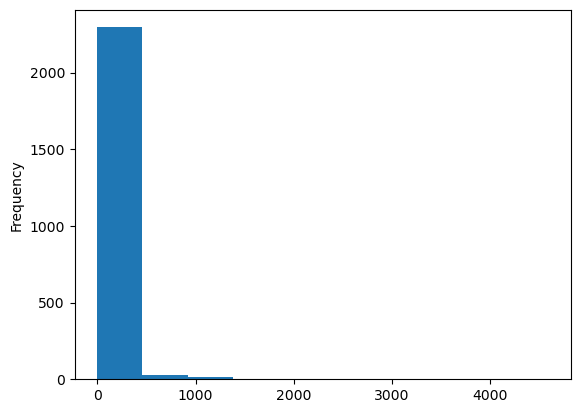

In [38]:
df1[df1['non_cancer_POD_[mg/kg-d]'].notnull()]['non_cancer_POD_[mg/kg-d]'].plot(kind = 'hist')

In [59]:
df1[(df1['reproductive/developmental_effects_POD_[mg/kg-d]'].notnull()) & (df1['final_picks']==1)]['reproductive/developmental_effects_POD_[mg/kg-d]'].max()

838.3205515662238

In [46]:
df1.columns

Index(['dtxsid', 'PREFERRED_NAME', 'CASRN', 'INCHIKEY', 'IUPAC_NAME', 'smiles',
       'INCHI_STRING', 'MOLECULAR_FORMULA', 'AVERAGE_MASS',
       'MONOISOTOPIC_MASS',
       ...
       'screenable_centroid', 'screenable_centroid_id',
       'screenable_centroid_id2', 'screening_analogues', 'screening_dist',
       'MaxMin_selection_picks', 'category_size', 'final_picks',
       'non_cancer_POD_[mg/kg-d]',
       'reproductive/developmental_effects_POD_[mg/kg-d]'],
      dtype='object', length=135)

In [65]:
df1[(df1['non_cancer_POD_[mg/kg-d]'].notnull()) ]['non_cancer_POD_[mg/kg-d]'].max()

4587.639251266699

In [68]:
df1[(df1['non_cancer_POD_[mg/kg-d]'].notnull()) & (df1['final_picks']==1)]['non_cancer_POD_[mg/kg-d]'].median()

26.02346098062007

In [62]:
df1[(df1['reproductive/developmental_effects_POD_[mg/kg-d]'].notnull()) ]['reproductive/developmental_effects_POD_[mg/kg-d]'].min()

4.315938011167974e-08

<Axes: ylabel='Frequency'>

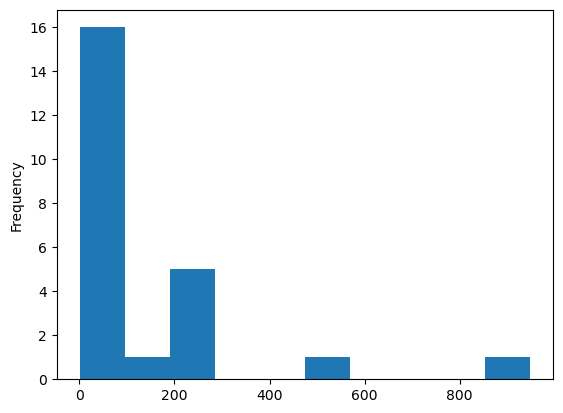

In [37]:
df1[(df1['non_cancer_POD_[mg/kg-d]'].notnull()) & (df1['final_picks']==1)]['non_cancer_POD_[mg/kg-d]'].plot(kind = 'hist')

In [123]:
df1.to_csv(interim_dir+'tsca_set_wtoxval.csv')

/tmp/ipykernel_315414/2742008988.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(df1[(df1['non_cancer_POD_[mg/kg-d]'].notnull())]['non_cancer_POD_[mg/kg-d]'], color = 'b', ax = ax, label = 'all TSCA')
/tmp/ipykernel_315414/2742008988.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplo

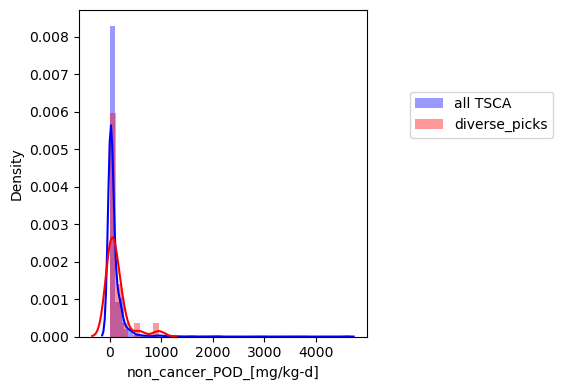

In [43]:
fig, ax = plt.subplots(figsize = (6,4))
g = sns.distplot(df1[(df1['non_cancer_POD_[mg/kg-d]'].notnull())]['non_cancer_POD_[mg/kg-d]'], color = 'b', ax = ax, label = 'all TSCA')
g = sns.distplot(df1[(df1['non_cancer_POD_[mg/kg-d]'].notnull()) & (df1['final_picks']==1)]['non_cancer_POD_[mg/kg-d]'], color = 'r', ax = ax, label = 'diverse_picks')
handles, labels = ax.get_legend_handles_labels()
#print(handles)
l = plt.legend(handles[0:5], labels[0:5], bbox_to_anchor=(1.15,0.75), loc=2, borderaxespad=0.);
plt.tight_layout();

In [69]:
def ecdf(data):
    '''
    Calculate the ecdf of a 1d-array
    Returns the x, y needed to plot the empirical ecdf
    '''
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1)/n
    return x, y

In [72]:
def toxval_summary(d, label = None):
    summary = {}
    summary['median'] = np.median(d)
    summary['ecdfx'], summary['ecdfy'] = ecdf(d)
    summary['label'] = label
    return summary

In [71]:
txval_nc= {}
for i, group in df1.groupby('group_str'):
    txval_nc[i] = group['non_cancer_POD_[mg/kg-d]'].values

In [73]:
txval_repro= {}
for i, group in df1.groupby('group_str'):
    txval_repro[i] = group['reproductive/developmental_effects_POD_[mg/kg-d]'].values

In [112]:
non_cancer= []
for k, v in txval_nc.items():
    non_cancer.append(toxval_summary(v, label = k))

In [113]:
repro = []
for k, v in txval_repro.items():
    repro.append(toxval_summary(v, label = k))

In [114]:
pd.DataFrame(non_cancer)[['median', 'label']].sort_values(by = 'median', ascending = True).head()

,median,label
88,0.565497,"('Mixed metal/non-metal compounds', 1.0)"
82,4.274281,"('Isoindoles and derivatives', nan)"
140,6.324715,"('Organosulfur compounds', 2.0)"
178,6.814948,"('Triazines', nan)"
147,9.557582,"('Oxanes', nan)"


In [115]:
pd.DataFrame(non_cancer)[['median', 'label']].dropna().sort_values(by = 'median', ascending = True).tail()

,median,label
106,37.646384,"('Organic carbonic acids and derivatives', 4.0)"
26,140.841729,"('Azolidines', 1.0)"
76,171.434395,"('Hydrocarbons', 1.0)"
68,576.668717,"('Glycerolipids', nan)"
47,2021.182463,"('Benzimidazoles', nan)"


In [77]:
pd.DataFrame(repro)[['median', 'label']].sort_values(by = 'median', ascending = True).head()

,median,label
29,5.577352,"('Azolidines', 4.0)"
178,5.832666,"('Triazines', nan)"
114,6.545916,"('Organic oxoanionic compounds', nan)"
74,17.036111,"('Homogeneous non-metal compounds', 4.0)"
157,63.888575,"('Phenols', 3.0)"


In [116]:
for i in range(len(non_cancer)):
    if non_cancer[i]['label'] in ["('Isoindoles and derivatives', nan)", "('Organosulfur compounds', 2.0)","('Benzimidazoles', nan)", "('Glycerolipids', nan)"]:
        print(i)

47
68
82
140


In [117]:
np.array(non_cancer[47]['ecdfx'], dtype = float)

array([          nan,    4.46929802,   14.03312081,   69.46911463,
                 nan,           nan,    8.00066522,   13.64041136,
        191.15163547,  191.15163547,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan, 2021.18246305,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan])

(35,) (35,)
(39,) (39,)
(39,) (39,)
(55,) (55,)


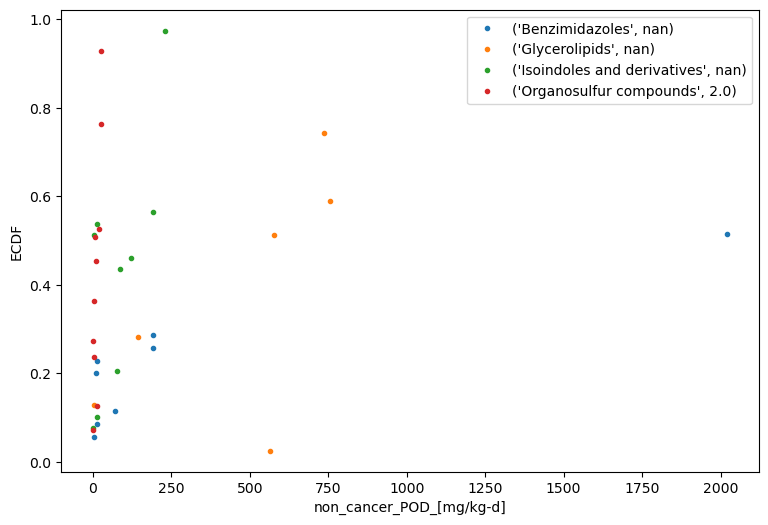

In [120]:
fig, ax = plt.subplots(figsize = (9,6))
for i in range(len(non_cancer)):
    if non_cancer[i]['label'] in ["('Isoindoles and derivatives', nan)", "('Organosulfur compounds', 2.0)", "('Benzimidazoles', nan)", "('Glycerolipids', nan)"]:
        ax.set_xlabel('non_cancer_POD_[mg/kg-d]')
        ax.set_ylabel('ECDF')
        
        # Filter NaN values from ecdfx and ecdfy arrays
        ecdfx = np.array(non_cancer[i]['ecdfx'], dtype=float)
       
        ecdfy = np.array(non_cancer[i]['ecdfy'], dtype=float)
        print(ecdfx.shape, ecdfy.shape)
        mask = np.isnan(ecdfx)
        mask = ~mask
        ecdfx_filtered = ecdfx[mask]
        ecdfy_filtered = ecdfy[mask]
        
        # Plot the ECDF
        ax.plot((ecdfx_filtered), ecdfy_filtered, marker='.', linestyle='none', label=non_cancer[i]['label'])

# Add legend outside the plot
ax.legend(bbox_to_anchor=(1, 1))
        

In [125]:
df1.shape

(14247, 135)

In [128]:
df1[df1['final_picks'] ==1]['group_str'].nunique()

106

In [129]:
df1['group_str'].nunique()

180

In [130]:
106/180

0.5888888888888889